<a href="https://colab.research.google.com/github/mxn170019/Happy-house-classification/blob/master/Happy_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Happy Face Detection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Imporing required Libraries
import glob
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from pathlib import Path
import seaborn as sns
from skimage.io import imread

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import Model, layers

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score

import time


np.random.seed(111)


In [0]:
#function to load data
def load_dataset():
    train_data = h5py.File('/content/drive/My Drive/happy-house-dataset/train_happy.h5', "r")
    x_train = np.array(train_data["train_set_x"][:]) 
    y_train = np.array(train_data["train_set_y"][:]) 

    test_data = h5py.File('/content/drive/My Drive/happy-house-dataset/test_happy.h5', "r")
    x_test = np.array(test_data["test_set_x"][:])
    y_test = np.array(test_data["test_set_y"][:]) 
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return x_train, y_train, x_test, y_test

In [0]:
X_train, Y_train, X_test, Y_test = load_dataset()

In [0]:
# Example pf images

def plots(ims, figsize=(20,10), rows=2, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
ims,labels = X_train[0:10],Y_train[0:10]

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


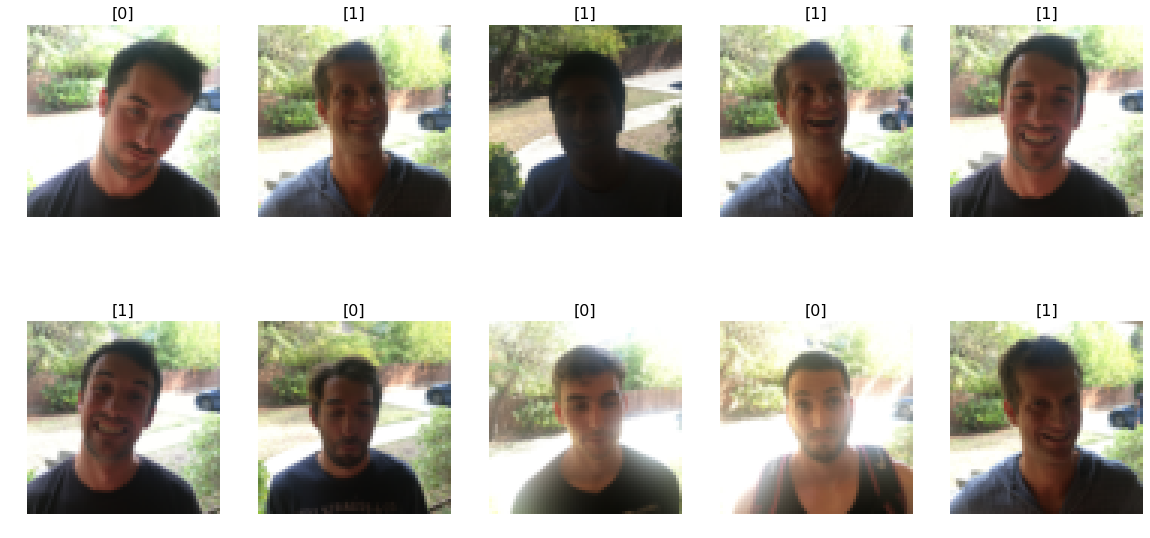

In [24]:
plots(ims,titles=labels.T)

In [30]:
#rescale data
X_train = X_train/255
X_test = X_test/255

#reshape target 
Y_train = Y_train.T
Y_test = Y_test.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [0]:
from keras import backend as K
K.set_image_dim_ordering('tf')

In [0]:
# Design the model
model = Sequential()

#first Conv Layer with input
model.add(Conv2D(32,(3,3),input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third Conv Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Forth Conv layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# the model so far outputs 3D feature maps (height, width, features)
#lets flatten the images

#First Dense layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#Second Dense layer
model.add(Dense(64))
model.add(Activation('relu'))

#Final logistic layer 
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


#Compile the model
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])


In [37]:
model.fit(X_train, Y_train, batch_size=20, epochs=35)


Epoch 1/35
600/600 [==============================] - 5s 8ms/step - loss: 0.6930 - acc: 0.5667
Epoch 2/35
600/600 [==============================] - 4s 6ms/step - loss: 0.6756 - acc: 0.5717
Epoch 3/35
600/600 [==============================] - 4s 6ms/step - loss: 0.5863 - acc: 0.7017
Epoch 4/35
600/600 [==============================] - 4s 6ms/step - loss: 0.3936 - acc: 0.8333
Epoch 5/35
600/600 [==============================] - 4s 6ms/step - loss: 0.2639 - acc: 0.8933
Epoch 6/35
600/600 [==============================] - 4s 6ms/step - loss: 0.2099 - acc: 0.9133
Epoch 7/35
600/600 [==============================] - 4s 6ms/step - loss: 0.1536 - acc: 0.9433
Epoch 8/35
600/600 [==============================] - 4s 6ms/step - loss: 0.1240 - acc: 0.9467
Epoch 9/35
600/600 [==============================] - 4s 6ms/step - loss: 0.0939 - acc: 0.9650
Epoch 10/35
600/600 [==============================] - 4s 6ms/step - loss: 0.0898 - acc: 0.9767
Epoch 11/35
600/600 [============================

KeyboardInterrupt: ignored

In [0]:
# Predict the test set results
Y_pred = model.predict_classes(X_test)


In [0]:
def prediction_report(test_labels,predictions):
  cm = confusion_matrix(test_labels,predictions)  
  print("Accuracy {}".format(accuracy_score(test_labels,predictions)))
  print("precision {}".format(precision_score(test_labels,predictions)))
  print("Recall {}".format(recall_score(test_labels,predictions)))
  print("\n")
        
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['NORMAL','PNEUMONIA']); ax.yaxis.set_ticklabels(['NORMAL','PNEUMONIA']);

Accuracy 0.94
precision 0.9518072289156626
Recall 0.9404761904761905




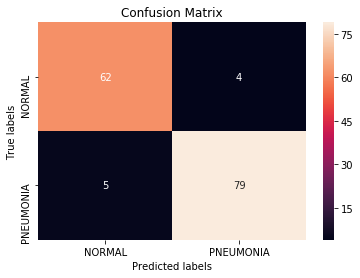

In [43]:
prediction_report(Y_test,Y_pred)